# 110. Balanced Binary Tree
Given a binary tree, determine if it is height-balanced.

For this problem, a height-balanced binary tree is defined as:

a binary tree in which the depth of the two subtrees of every node never differ by more than 1.

Example 1:

Given the following tree [3,9,20,null,null,15,7]:

        3
       / \
      9  20
        /  \
       15   7
Return true.

This problem is generally believed to have two solutions: the top down approach and the bottom up way.

## Approach 1: top down
The first method checks whether the tree is balanced strictly according to the definition of balanced binary tree: the difference between the heights of the two sub trees are not bigger than 1, and both the left sub tree and right sub tree are also balanced. With the helper function depth(), we could easily write the code;

* Time O(n^2): For the current node root, calling depth() for its left and right children actually has to access all of its children, thus the complexity is O(N). We do this for each node in the tree, so the overall complexity of isBalanced will be O(N^2). 
- I think it should be O(nlogn) in average case, and O(n^2) in worse case ( skew tree

* Space O(n) ?

In [ ]:
def isBalanced(root):
    def depth(node):
        if not node:
            return 0
        return max(depth(node.left),depth(node.right)) +1

    if not root:
        return True
    left,right = depth(root.left),depth(root.right)
    return abs(left - right) <= 1 and self.isBalanced(root.left) and self.isBalanced(root.right)

## Approach 2: bottom up
The second method is based on DFS. Instead of calling depth() explicitly for each child node, we return the height of the current node in DFS recursion. When the sub tree of the current node (inclusive) is balanced, the function dfsHeight() returns a non-negative value as the height. Otherwise -1 is returned. According to the leftHeight and rightHeight of the two children, the parent node could check if the sub tree
is balanced, and decides its return value.

* Time O(n): each node in the tree only need to be accessed once. 

In [ ]:
def isBalanced(root):
    def dfsHeight(root):
        if not root:
            return 0
        left,right = dfsHeight(root.left),dfsHeight(root.right)
        if left == -1 or  right == -1 or abs(left-right) > 1:
            return -1
        return max(left,right) + 1

    return dfsHeight(root) != -1

#  101. Symmetric Tree
Given a binary tree, check whether it is a mirror of itself (ie, symmetric around its center).

For example, this binary tree [1,2,2,3,4,4,3] is symmetric:

        1
       / \
      2   2
     / \ / \
    3  4 4  3
 

But the following [1,2,2,null,3,null,3] is not:

        1
       / \
      2   2
       \   \
       3    3


## Approach 1: Recursive
A tree is symmetric if the left subtree is a mirror reflection of the right subtree.

Push an element in stack

Therefore, the question is: when are two trees a mirror reflection of each other?

Two trees are a mirror reflection of each other if:

1. Their two roots have the same value.
2. The right subtree of each tree is a mirror reflection of the left subtree of the other tree.

![101_Symmetric_Mirror.png](attachment:101_Symmetric_Mirror.png)

Complexity Analysis

* Time complexity : O(n). Because we traverse the entire input tree once, the total run time is O(n), where n is the total number of nodes in the tree.

* Space complexity : The number of recursive calls is bound by the height of the tree. In the worst case, the tree is linear and the height is in O(n). Therefore, space complexity due to recursive calls on the stack is O(n)O(n) in the worst case. 

In [ ]:
def isSymmetric(root):
    def isSymetricRec(tree1,tree2):
        if not tree1 and not tree2:
            return True
        if not tree1 or not tree2 or tree1.val != tree2.val:
            return False
        return tree1.val == tree2.val and isSymetricRec(tree1.left,tree2.right) and isSymetricRec(tree1.right,tree2.left)

    if not root: return True
    return isSymetricRec(root.left,root.right)


# 199. Binary Tree Right Side View
Given a binary tree, imagine yourself standing on the right side of it, return the values of the nodes you can see ordered from top to bottom.

Example:

Input: [1,2,3,null,5,null,4]

Output: [1, 3, 4]
Explanation:

       1            <---
     /   \
    2     3         <---
     \     \
      5     4       <---

## Aproach: recursive
Compute the right view of both right and left left subtree, then combine them. For very unbalanced trees, this can be O(n^2), though.

In [ ]:
def rightSideView(root):
    if not root:
        return []
    right = self.rightSideView(root.right)
    left = self.rightSideView(root.left)
    return [root.val] + right + left[len(right):]

## Approach 1: Depth-First Search 
Intuition

We can efficiently obtain the right-hand view of the binary tree if we visit each node in the proper order.

Algorithm

One of the aforementioned orderings is defined by a depth-first search in which we always visit the right subtree first. This guarantees that the first time we visit a particular depth of the tree, the node that we are visiting is the rightmost node at that depth. Therefore, we can store the value of the first node that we visit at each depth, ultimately generating a final array of values once we know exactly how many layers are in the tree.

Depth-First Search
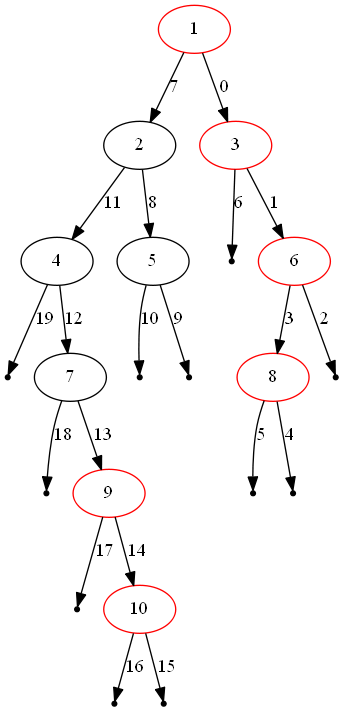

The figure above illustrates one instance of the problem. The red nodes compose the solution from top to bottom, and the edges are labelled in order of visitation.

In [ ]:
def rightSideView(root):
    # DFS-traverse the tree right-to-left, add values to the view whenever we first reach a new record depth. 
    #This is O(n).
    def collect(node,depth):
        if node:
            if depth == len(view):
                view.append(node.val)
            collect(node.right,depth+1)
            collect(node.left,depth+1)

    view = []
    collect(root,0)
    return view

In [ ]:
def rightSideView(root):
    # store value of the first node that we visit at each depth
    rightmost_at_depth = dict() # depth -> node.val
    max_depth = -1

    stack = [(root,0)]
    while stack:
        node,depth = stack.pop()
        if node is not None:
            # maintain knowledge of the number of levels in the tree
            max_depth = max(max_depth,depth)
            # only insert into dict if depth is not already present
            rightmost_at_depth.setdefault(depth,node.val)

            stack.append((node.left,depth+1))
            stack.append((node.right,depth+1))

    return [rightmost_at_depth[depth] for depth in range(max_depth+1)]

## Approach 2: Breadth-First Search 
Intuition

Much like depth-first search can guarantee that we visit a depth's rightmost node first, breadth-first search can guarantee that we visit it last.

Algorithm

By performing a breadth-first search that enqueues the left child before the right child, we visit each node in each layer from left to right. Therefore, by retaining only the most recently visited node per depth, we will have the rightmost node for each depth once we finish the tree traversal. The algorithm is unchanged, other than swapping out the stack for a deque[1] and removing the containment check before assigning into rightmost_value_at_depth.

Breadth-first Search Example

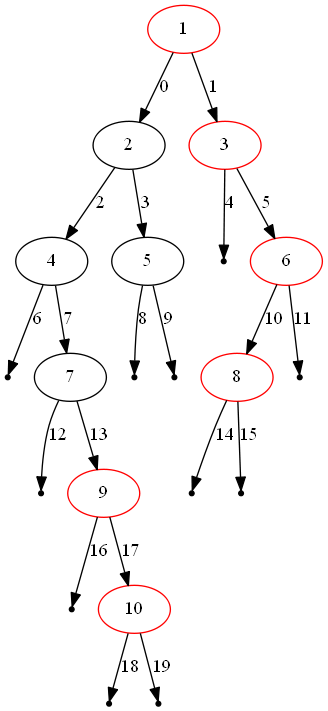

The figure above illustrates the same instance as before, but solved via breadth-first search. The red nodes compose the solution from top to bottom, and the edges are labelled in order of visitation.

In [ ]:
def rightSideView(root):
    # Traverse the tree level by level and add the last value of each level to the view. 
    #This is O(n).
    view = []
    if root:
        level = [root]
        while level:
            view.append(level[-1].val)
            level = [kid for node in level for kid in (node.left,node.right) if kid]
    return view

# 113. Path Sum II
Given a binary tree and a sum, find all root-to-leaf paths where each path's sum equals the given sum.

Note: A leaf is a node with no children.

Example:

Given the below binary tree and sum = 22,

          5
         / \
        4   8
       /   / \
      11  13  4
     /  \    / \
    7    2  5   1
Return:

    [
       [5,4,11,2],
       [5,8,4,5]
    ]

In [ ]:
def pathSum(self, root: TreeNode, s: int) -> List[List[int]]:
    if not root:
        return []
    res = []
    stack = [(root,[root.val])]
    while stack:
        cur,path = stack.pop()
        if not cur.left and not cur.right and sum(path) == s:
            res.append(path)
        if cur.left:
            stack.append((cur.left,path + [cur.left.val]))
        if cur.right:
            stack.append((cur.right, path + [cur.right.val]))
    return res


In [ ]:
def pathSum(self, root: TreeNode, sum: int) -> List[List[int]]:
    res = []
    def helper(node,sum,path):
        if not node:
            return
        if not node.left and not node.right and node.val == sum:
            res.append(path + [node.val])
        helper(node.left,sum-node.val,path + [node.val])
        helper(node.right,sum-node.val,path + [node.val])


    helper(root,sum,[])
    return res

# 236. Lowest Common Ancestor of a Binary Tree
Given a binary tree, find the lowest common ancestor (LCA) of two given nodes in the tree.

According to the definition of LCA on Wikipedia: “The lowest common ancestor is defined between two nodes p and q as the lowest node in T that has both p and q as descendants (where we allow a node to be a descendant of itself).”

Given the following binary tree:  root = [3,5,1,6,2,0,8,null,null,7,4]

             3
           /  \
          5    1
         / \  / \
        6   2 0  8
           / \
          7  4


Example 1:

Input: root = [3,5,1,6,2,0,8,null,null,7,4], p = 5, q = 1
Output: 3
Explanation: The LCA of nodes 5 and 1 is 3.

## Intuition
We can resort to a normal tree traversal to search for the two nodes. Once we reach the desired nodes p and q, we can backtrack and find the lowest common ancestor.

## Aproach 1: Recursive Approach

Intuition

The approach is pretty intuitive. Traverse the tree in a depth first manner. The moment you encounter either of the nodes p or q, return some boolean flag. The flag helps to determine if we found the required nodes in any of the paths. The least common ancestor would then be the node for which both the subtree recursions return a True flag. It can also be the node which itself is one of p or q and for which one of the subtree recursions returns a True flag.

Let us look at the formal algorithm based on this idea.

In [ ]:
def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
    res = None
    def helper(current_node):
        # if reach the end of branch or found p or q
        if not current_node or current_node == p or current_node == q:
            return current_node
        # Search left subtree and right subtree to get information from its chidren
        left = helper(current_node.left)
        right = helper(current_node.right)

        # if p and q from different side of root
        if left and right:
            return current_node
        # return non null result
        return left or right

    return helper(root)

In [ ]:
def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
    if root in (None,p,q):
        return root
    left,right = self.lowestCommonAncestor(root.left,p,q),self.lowestCommonAncestor(root.right,p,q)
    return root if left and right else left or right

## Approach 2: Iterative using parent pointers
Intuition

If we have parent pointers for each node we can traverse back from p and q to get their ancestors. The first common node we get during this traversal would be the LCA node. We can save the parent pointers in a dictionary as we traverse the tree.

Algorithm

- Start from the root node and traverse the tree.
- Until we find p and q both, keep storing the parent pointers in a dictionary.
- Once we have found both p and q, we get all the ancestors for p using the parent dictionary and add to a set called ancestors.
- Similarly, we traverse through ancestors for node q. If the ancestor is present in the ancestors set for p, this means this is the first ancestor common between p and q (while traversing upwards) and hence this is the LCA node.

In [ ]:
def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
    # stack for tree traversal
    stack = [root]
    # Dictionary for parent pointer
    parent = {root:None}
    #traverse ultil we find both  p and q, keep store parent pointer
    while p not in parent or q not in parent:
        node = stack.pop()
        if node.left:
            parent[node.left] = node
            stack.append(node.left)
        if node.right:
            parent[node.right] = node
            stack.append(node.right)
    #traverse through parent pointer to get all ancestor of p
    ancestors = set()
    while p:
        ancestors.add(p)
        p = parent[p]
    # traverse through parent pointer of node q
    while q not in ancestors:
        q = parent[q]

    return q